## LABORATORY 03: DATA SCIENCE - INTERNATIONAL EDUCATION COSTS ANALYSIS

### 1. Metadata

* Data Science problem

This is a simulated dataset exploring how lifestyle habits affect academic performance in students. With 1,000 synthetic student records and 15+ features including study hours, sleep patterns, social media usage, diet quality, mental health, and final exam scores, it’s perfect for ML projects, regression analysis, clustering, and data viz. Created using realistic patterns for educational practice.

Ever wondered how much Netflix, sleep, or TikTok scrolling affects your grades? 👀 This dataset simulates 1,000 students' daily habits—from study time to mental health—and compares them to final exam scores. It's like spying on your GPA through the lens of lifestyle. Perfect for EDA, ML practice, or just vibing with data while pretending to be productive.  

* Definition of variables

| Variable          | Description                                      |
|-------------------|--------------------------------------------------|
| student_id                    | A unique identifier for each student. |
| age                           | The student's age. |
| gender                        | The student's gender (Male/Female/Other). |
| study_hours_per_day           | The average number of hours per day spent studying. |
| social_media_hours            | The average number of hours per day spent on social media. |
| netflix_hours                 | The average number of hours per day spent watching Netflix. |
| part_time_job                 | Indicates whether the student has a part-time job (Yes/No). |
| attendance_percentage         | The percentage of classes the student attended (0–100%). |
| sleep_hours                   | The average number of hours of sleep per night. |
| diet_quality                  | The quality of the student’s diet (Poor/Fair/Good). |
| exercise_frequency            | How many days per week the student exercises. |
| parental_education_level      | The highest education level attained by the student’s parents (e.g., High School, Bachelor, Master). |  
| internet_quality              | The quality of the student’s home internet connection (e.g., Poor, Average, Good). |
| mental_health_rating          | The student’s self-rated mental health on a scale from 1 to 10. |
| extracurricular_participation | Whether the student participates in extracurricular activities (Yes/No). |
| exam_score                    | The student’s final exam score as a percentage. |

### 2. Data Collection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [4]:
# load dataset
dataset = pd.read_csv("dataset\student_habits_performance.csv")
dataset.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [5]:
# print dataset dimensionality
def get_dimensionality(data):        
    print(f"#samples = {data.shape[0]}")
    print(f"#features = {data.shape[1]}")

In [6]:
get_dimensionality(dataset)

#samples = 1000
#features = 16


In [7]:
# manage metadata
def get_metadata(data):
    metadata = {}
    metadata["numerical"] = data.select_dtypes(include = ["float64", "int64"]).columns.tolist()
    metadata["categorical"] = data.select_dtypes(include = ["object"]).columns.tolist()
    print("Numerical features: ", metadata["numerical"])
    print("Categorical features: ", metadata["categorical"])
    
    return metadata

In [8]:
get_metadata(dataset)

Numerical features:  ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']
Categorical features:  ['student_id', 'gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']


{'numerical': ['age',
  'study_hours_per_day',
  'social_media_hours',
  'netflix_hours',
  'attendance_percentage',
  'sleep_hours',
  'exercise_frequency',
  'mental_health_rating',
  'exam_score'],
 'categorical': ['student_id',
  'gender',
  'part_time_job',
  'diet_quality',
  'parental_education_level',
  'internet_quality',
  'extracurricular_participation']}

### 3. Filter missing values

In [9]:
def filter_missing(data):
    sbn.displot(
        data = data.isna().melt(value_name = "missing"),
        y = "variable",
        hue = "missing",
        multiple = "fill",
        aspect = 1.5
    )

    plt.show()
    cleaned_data = data.dropna()

    return cleaned_data

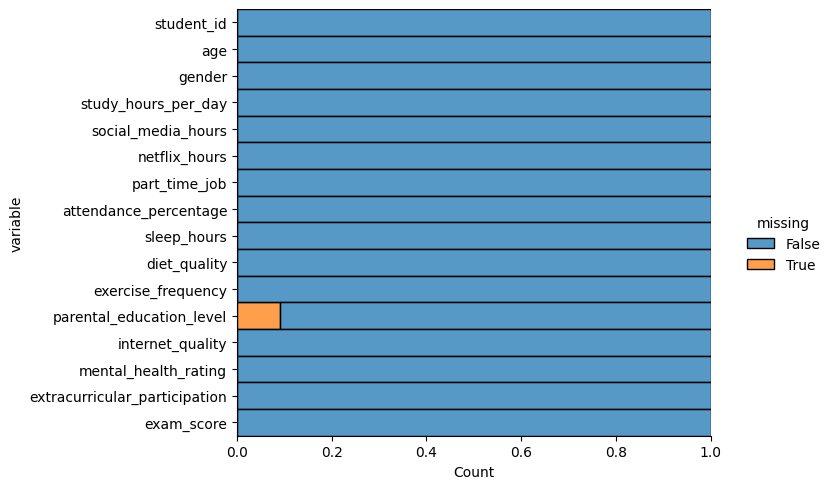

In [10]:
dataset = filter_missing(dataset)

In [11]:
print("New dimensionality after filtering")
get_dimensionality(dataset)

New dimensionality after filtering
#samples = 909
#features = 16


### 4. Data Visualization for numerical variables

#### Histogram

In [12]:
variables = ["age", "study_hours_per_day", "social_media_hours", "netflix_hours", "attendance_percentage", "sleep_hours", "exercise_frequency", "mental_health_rating", "exam_score"]

In [32]:
def hist_frequencies(data, variables, bins = 10):
    ncol_plots = 3
    nrow_plots = (len(variables) + ncol_plots - 1) // ncol_plots
    fig, ax = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    ax = ax.flatten()
    colors = ["skyblue", "lightgreen", "salmon", "orange", "red", "purple", "brown", "darkgray", "yellow"]

    for i, col in enumerate(variables):
        sbn.histplot(data = data[col], ax = ax[i], color = colors[i], bins = bins)
        plt.xlabel(col)
        plt.ylabel("Frequencies")
        ax[i].set_title(f"Histogram of Frequencies for {col}", fontsize = 14)
        
    plt.tight_layout()
    plt.show()

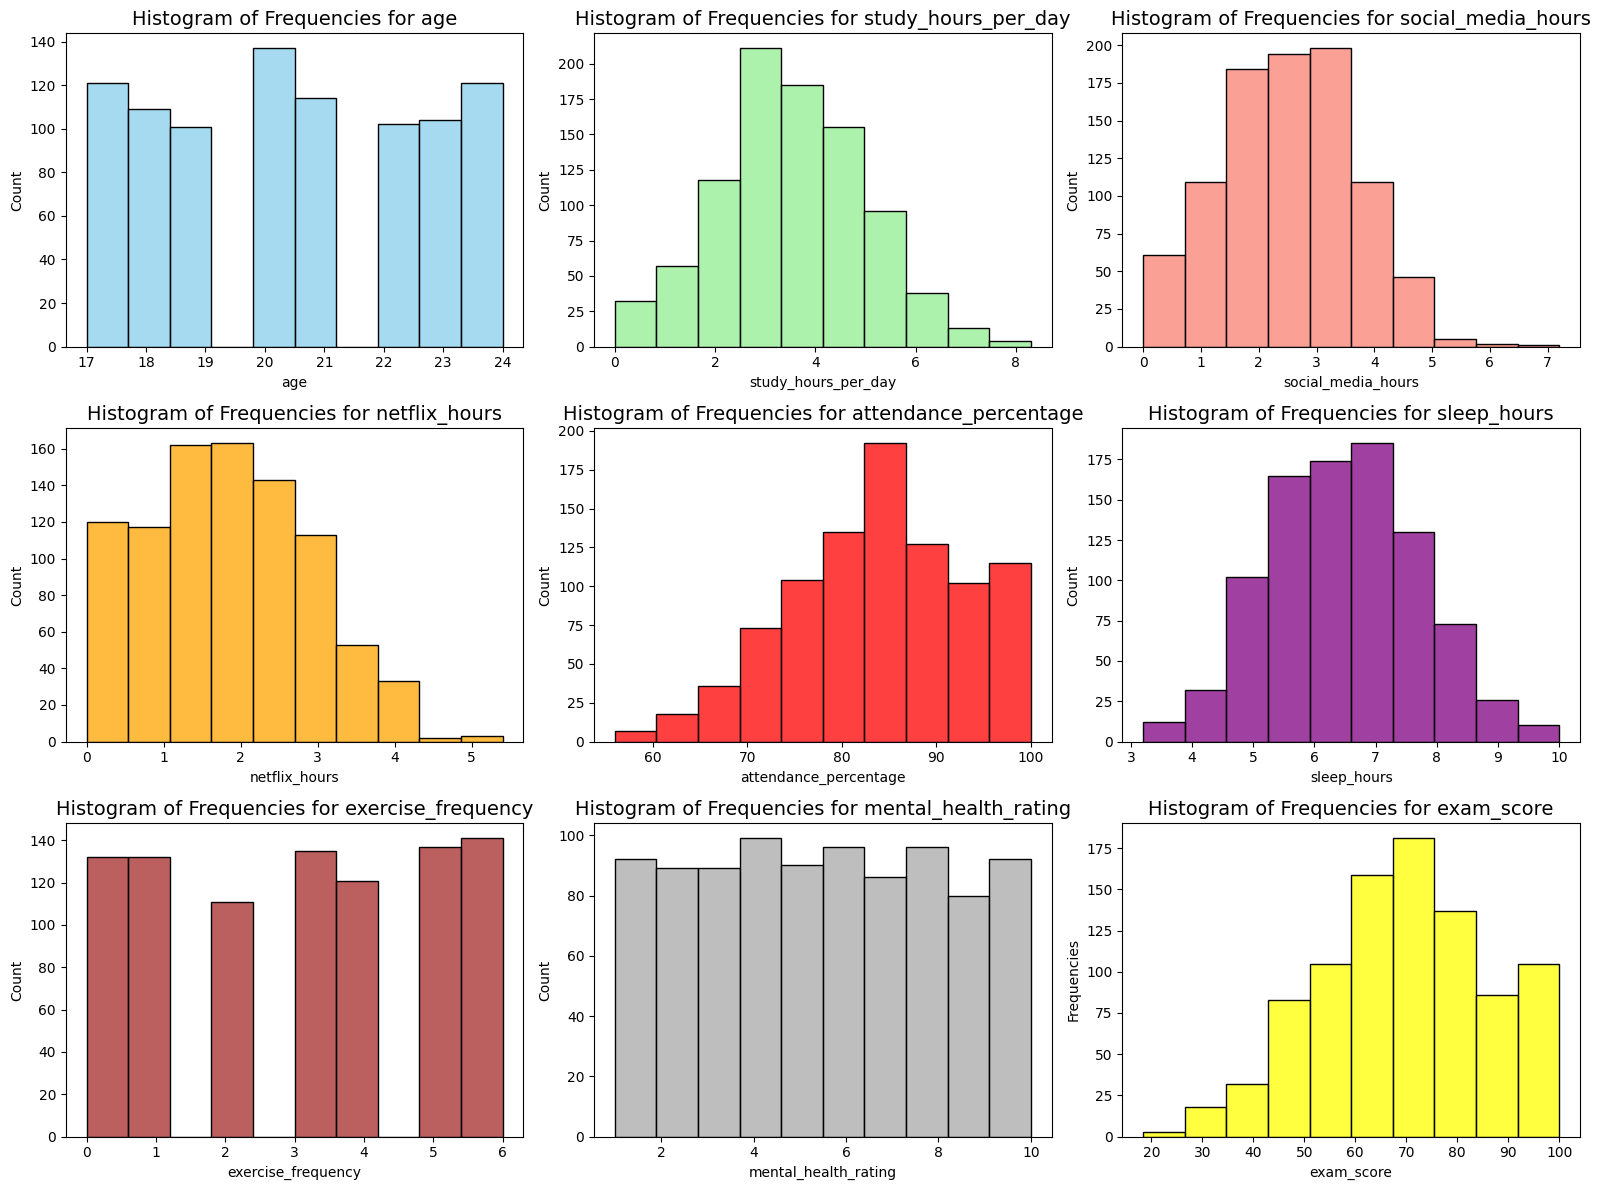

In [33]:
hist_frequencies(dataset, variables)

#### Bivariate charts

In [30]:
def bivariate_plots(data, x_var, y_var):
    ncol_plots = 1
    nrow_plots = (len(x_var) + ncol_plots - 1) // ncol_plots
    fig, ax = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    ax = ax.flatten()
    colors = ["skyblue", "lightgreen", "salmon"]

    for i, col in enumerate(x_var):
        ax[i] = sbn.barplot(data = data, x = col, y = y_var, ax = ax[i], color = colors[i], errorbar = None)
        ax[i].bar_label(ax[i].containers[0], fontsize = 10)
        ax[i].set_title(f"{y_var} vs {col}", fontsize = 14)
        plt.xlabel(col)
        plt.ylabel(y_var)
        
    plt.tight_layout()
    plt.show()

Bivariants for Income

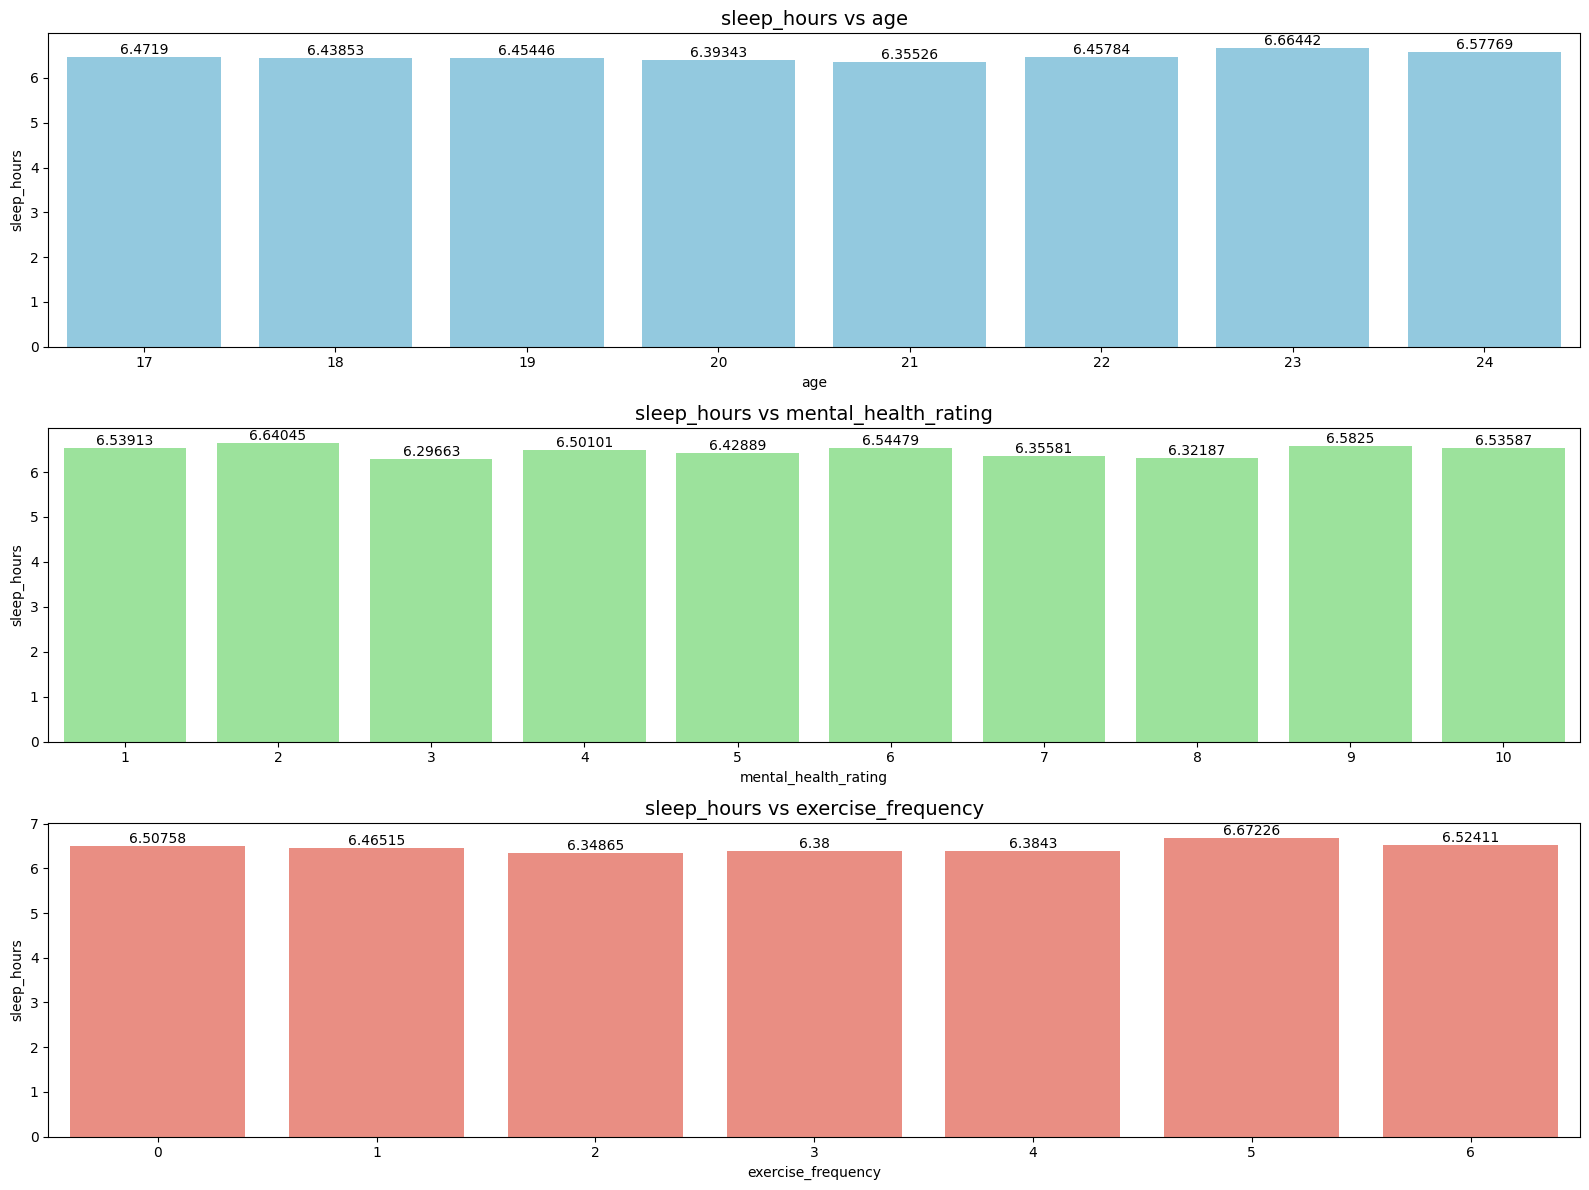

In [31]:
bivariate_plots(data = dataset, x_var = ["age", "mental_health_rating", "exercise_frequency"], y_var = "sleep_hours")

#### Box Plot

In [39]:
def get_boxplot(data, x_var):
    ncol_plots = 3
    nrow_plots = (len(x_var) + ncol_plots - 1) // ncol_plots
    fig, ax = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    ax = ax.flatten()
    colors = ["skyblue", "lightgreen", "salmon", "orange", "red", "purple", "brown", "darkgray", "yellow"]

    for i, col in enumerate(x_var):
        sbn.boxplot(data = data, x = col, ax = ax[i], color = colors[i])
        ax[i].set_title(f"Box Plot for {col}", fontsize = 14)
        ax[i].set_xlabel(col)
        
    plt.tight_layout()
    plt.show()

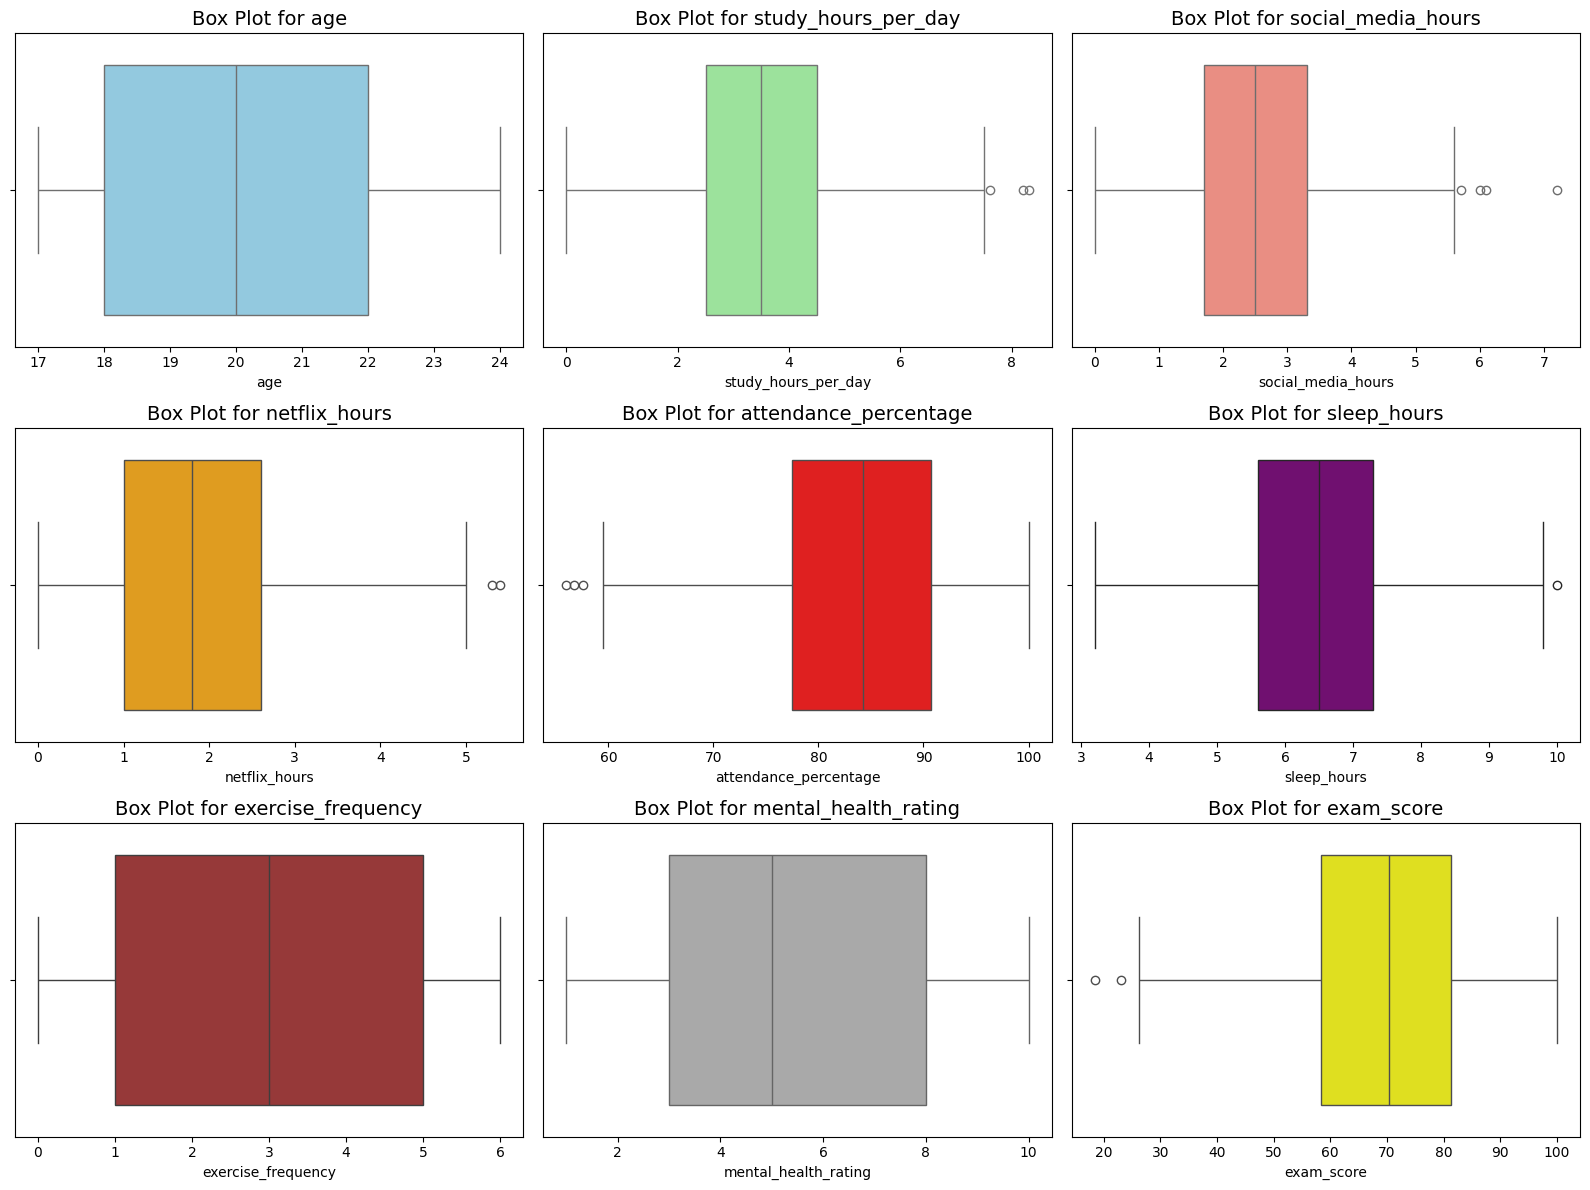

In [40]:
get_boxplot(data = dataset, x_var = ["age", "study_hours_per_day", "social_media_hours", "netflix_hours", "attendance_percentage", "sleep_hours", "exercise_frequency", "mental_health_rating", "exam_score"])

#### Statistical Metrics

In [41]:
variables = ["age", "study_hours_per_day", "social_media_hours", "netflix_hours", "attendance_percentage", "sleep_hours", "exercise_frequency", "mental_health_rating", "exam_score"]
dataset[variables].describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,2.504620,1.830363,83.880308,6.474037,3.051705,5.466447,69.558196
std,2.302721,1.469730,1.164802,1.071251,9.453622,1.218943,2.035632,2.857525,16.929436
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.000000,2.500000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.400000
50%,20.000000,3.500000,2.500000,1.800000,84.200000,6.500000,3.000000,5.000000,70.400000
75%,22.000000,4.500000,3.300000,2.600000,90.700000,7.300000,5.000000,8.000000,81.300000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


#### Correlation Analysis

The correlation between 2 variables quantify the linear relationship between the variables X and Y:  
$$ r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$   
Where:  
  
$r$: pearson correlation coefficient  
$Cov(x, y)$: covariance between variables X and Y. It measures how much the two variables change together.  
$\sigma_X, \sigma_Y$: standard deviations for variables X and Y.  

Formula of Covariance:  
$$ \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$  
Formula for standard deviation for X:  
$$ \sigma_X = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2} $$  
Formula for standard deviation for Y:  
$$ \sigma_Y = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2} $$  

In [42]:
variables = ["age", "study_hours_per_day", "social_media_hours", "netflix_hours", "attendance_percentage", "sleep_hours", "exercise_frequency", "mental_health_rating", "exam_score"]

In [43]:
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()    
    plt.show()

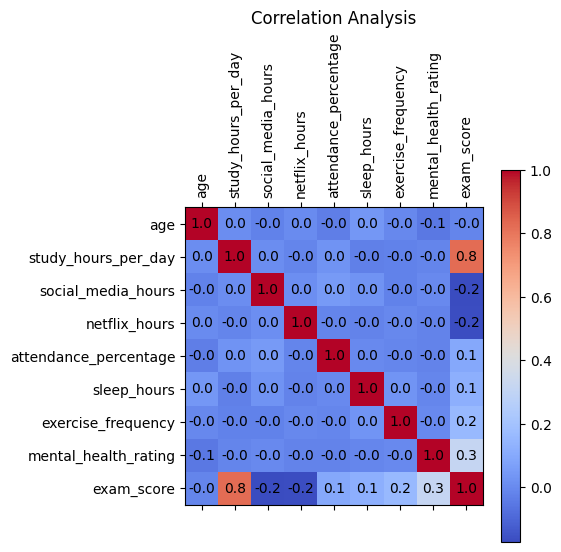

In [44]:
plot_correlation(dataset, variables)

Implications of Low Correlation

- **Independence of Features**:  
Low correlation suggests that the features are likely independent of each other. 
This can be beneficial because independent features provide unique information to the model, which can improve its performance.
- **Feature Redundancy**:   
When features are not correlated, it reduces the risk of redundancy. 
Including redundant features (highly correlated) can lead to issues like multicollinearity, making it difficult to interpret the model and possibly degrading its performance.

### 5. Data Visualization for categorical variables

In [47]:
variables = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']
variables

['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

Count instances for each categorical variable

In [48]:
for col in variables:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** gender ******
gender
Male      440
Female    433
Other      36
Name: count, dtype: int64

***** part_time_job ******
part_time_job
No     713
Yes    196
Name: count, dtype: int64

***** diet_quality ******
diet_quality
Fair    396
Good    347
Poor    166
Name: count, dtype: int64

***** parental_education_level ******
parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

***** internet_quality ******
internet_quality
Good       410
Average    352
Poor       147
Name: count, dtype: int64

***** extracurricular_participation ******
extracurricular_participation
No     620
Yes    289
Name: count, dtype: int64


Bar chart for absolute frequencies

In [49]:
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()    
    ax = sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    ax.bar_label(ax.containers[0], fontsize = 10, fmt = "%d")
    plt.title("Statistical analysis by " + col)
    plt.show()

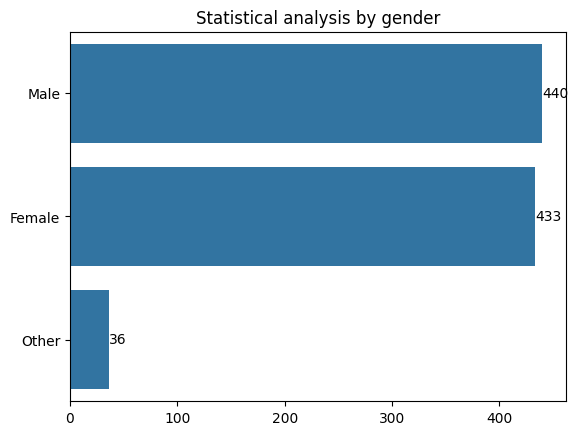

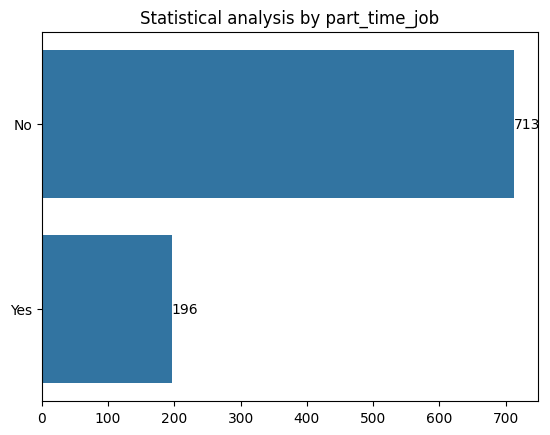

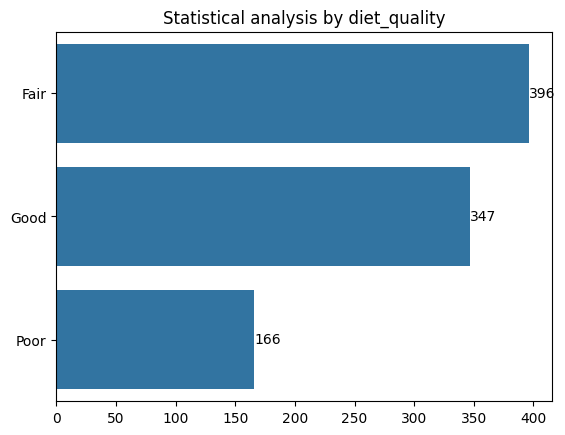

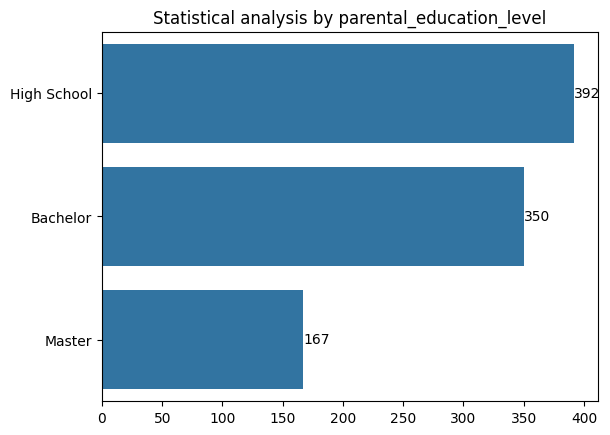

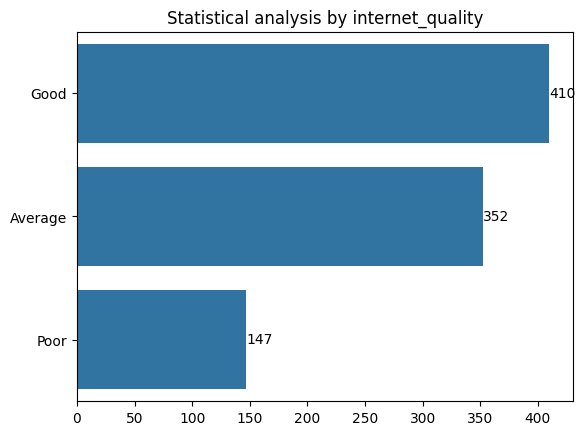

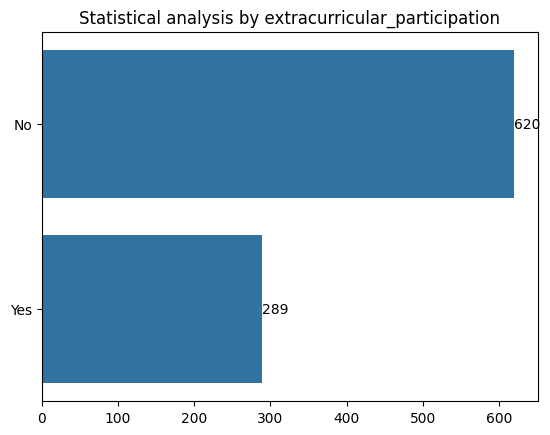

In [50]:
for col in variables:
    plot_barchart(dataset, col)

Pie chart for relative frequencies

In [51]:
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

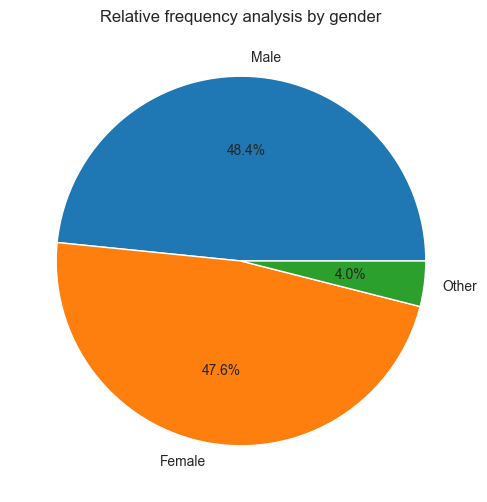

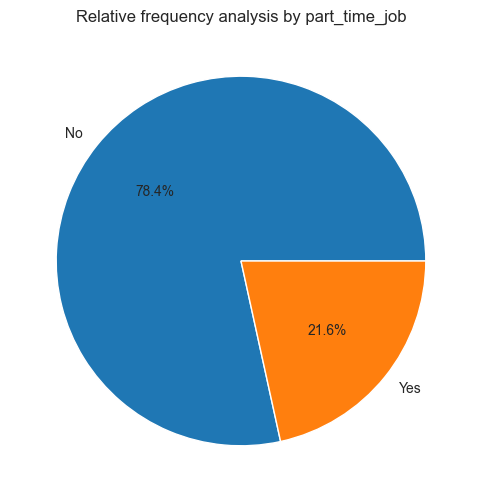

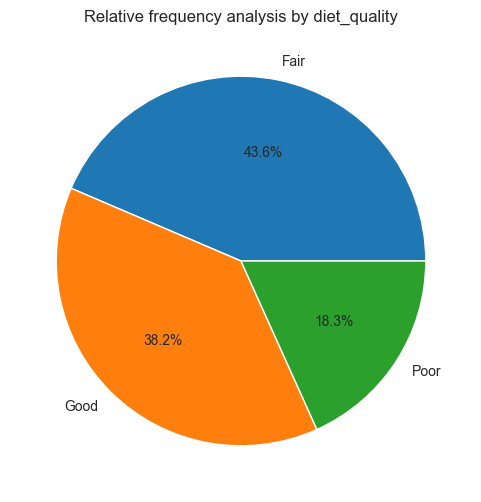

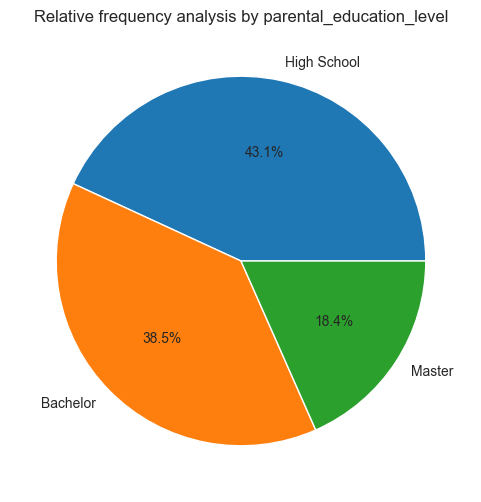

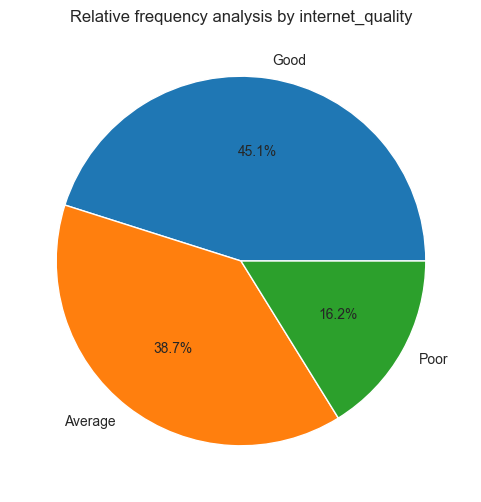

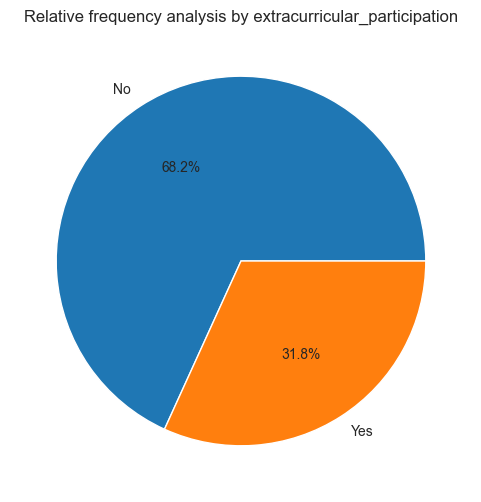

In [52]:
for col in variables:
    plot_piechart(dataset, col)

### 6. Statistical Analysis for subgroups

In [53]:
group01 = dataset.groupby(["diet_quality", "parental_education_level"]).size().reset_index(name = "samples")
print(group01)

  diet_quality parental_education_level  samples
0         Fair                 Bachelor      157
1         Fair              High School      167
2         Fair                   Master       72
3         Good                 Bachelor      130
4         Good              High School      156
5         Good                   Master       61
6         Poor                 Bachelor       63
7         Poor              High School       69
8         Poor                   Master       34


In [55]:
top10_group01 = group01.nlargest(10, "samples")

others_group01 = group01[~group01.index.isin(top10_group01.index)]["samples"].sum()
others_row = pd.DataFrame({
    "diet_quality": ["Others"],
    "parental_education_level": ["Others"],
    "samples": [others_group01]
})

final_group01 = pd.concat([top10_group01, others_row], ignore_index=True)

print(final_group01)

  diet_quality parental_education_level  samples
0         Fair              High School      167
1         Fair                 Bachelor      157
2         Good              High School      156
3         Good                 Bachelor      130
4         Fair                   Master       72
5         Poor              High School       69
6         Poor                 Bachelor       63
7         Good                   Master       61
8         Poor                   Master       34
9       Others                   Others        0


Absolute frequency analysis

In [56]:
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel(g1)
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies')
    plt.tight_layout()
    plt.show()

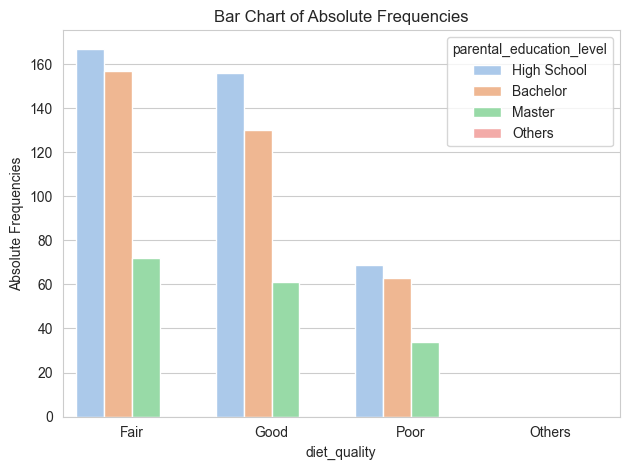

In [58]:
plot_absfreq_groups(final_group01, "diet_quality", "parental_education_level")

Relative frequency analysis

In [59]:
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " with " + group[g2] + " condition"
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies')
    plt.show()

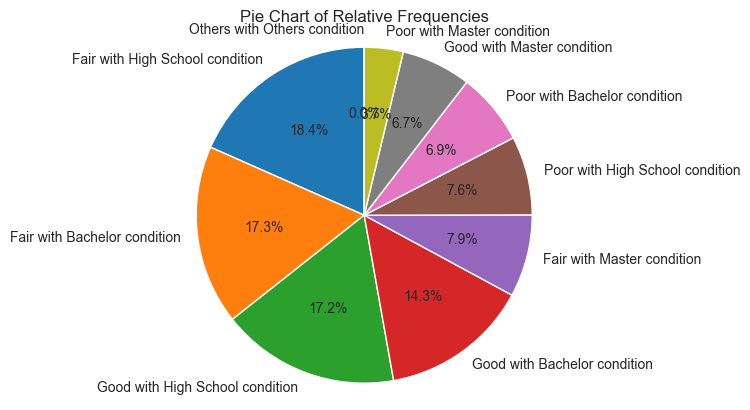

In [60]:
plot_relfreq_groups(final_group01, "diet_quality", "parental_education_level")